In [36]:
# zkouska  2023-24 - radny 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk, freqs, decimate, convolve2d 

# --- 1 ---- 
x = [1,2,3]; h = [1,-1,1]; print(np.convolve(x,h))
x = [1,2,3]; h = [1,-1,-1]; print(np.convolve(x,h))
x = [1,2,3]; h = [1,-1,-2]; print(np.convolve(x,h))
x = [1,2,3]; h = [1,-1,2]; print(np.convolve(x,h))

[ 1  1  2 -1  3]
[ 1  1  0 -5 -3]
[ 1  1 -1 -7 -6]
[1 1 3 1 6]


[1. 0. 0.] [ 1.  -1.   0.5]
2.0
0.8944271909999159
0.40000421678069636
(1+0j) 1.9999999999999998
(6.123233995736766e-17+1j) 0.8944271909999159
(-1+1.2246467991473532e-16j) 0.39999999999999997
0.5 0.5 1.414213562373095
1.5 0.5 0.6324555320336759


0.6324555320336759

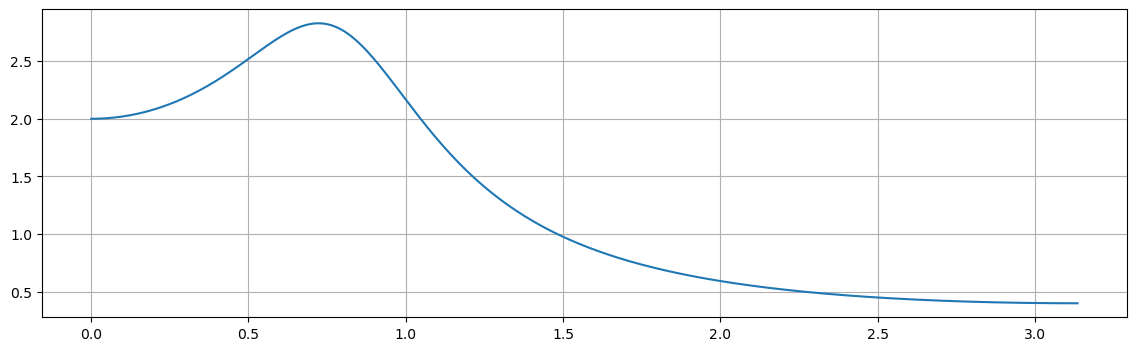

In [64]:
# --- 4 --- nuly poly frekv char 
n1 = 0
n2 = 0
p1 = 0.5+0.5j
p2 = 0.5-0.5j
b = np.poly([n1,n2])
a = np.poly([p1,p2])
print(b,a)
om,H = freqz(b,a,512)
fig = plt.figure(figsize=(14,4))
plt.plot(om,np.abs(H))
plt.gca().grid()

print(np.abs(H[0]))
print(np.abs(H[256]))
print(np.abs(H[511]))
# by hand 
ejo = np.exp(1j * 0)
absH = np.abs(ejo-n1) * np.abs(ejo-n2) / np.abs(ejo-p1) / np.abs(ejo-p2)
print(ejo, absH)
ejo = np.exp(1j * np.pi / 2)
absH = np.abs(ejo-n1) * np.abs(ejo-n2) / np.abs(ejo-p1) / np.abs(ejo-p2)
print(ejo, absH)
ejo = np.exp(1j * np.pi )
absH = np.abs(ejo-n1) * np.abs(ejo-n2) / np.abs(ejo-p1) / np.abs(ejo-p2)
print(ejo, absH)
# hodnoty do pomucky 
def inv_euclid(a,b):
    ie = 1/np.sqrt(np.square(a) + np.square(b))
    print(a,b,ie)
    return(ie)
inv_euclid(0.5,0.5)
inv_euclid(1.5,0.5)


In [30]:
# --- 8 base 2D dft ---jedeme jen realnou ! 
kall = np.arange(100)
m = 5; n = 3; 
a = np.exp(-2 * np.pi * 1j * (np.outer(m * kall / 100,np.ones(100)) + np.outer(np.ones(100),n * kall / 100)))
fig=plt.figure(figsize=(4,4)); plt.imshow(np.real(a), 'gray', vmin=-1, vmax=1); fig.savefig('fig/53_re.eps')
m = 1; n = 2; 
a = np.exp(-2 * np.pi * 1j * (np.outer(m * kall / 100,np.ones(100)) + np.outer(np.ones(100),n * kall / 100)))
fig=plt.figure(figsize=(4,4)); plt.imshow(np.real(a), 'gray', vmin=-1, vmax=1); fig.savefig('fig/12_re.eps')
m = 3; n = 4; 
a = np.exp(-2 * np.pi * 1j * (np.outer(m * kall / 100,np.ones(100)) + np.outer(np.ones(100),n * kall / 100)))
fig=plt.figure(figsize=(4,4)); plt.imshow(np.real(a), 'gray', vmin=-1, vmax=1); fig.savefig('fig/34_re.eps')
m = 0; n = 4; 
a = np.exp(-2 * np.pi * 1j * (np.outer(m * kall / 100,np.ones(100)) + np.outer(np.ones(100),n * kall / 100)))
fig=plt.figure(figsize=(4,4)); plt.imshow(np.real(a), 'gray', vmin=-1, vmax=1); fig.savefig('fig/04_re.eps')

In [39]:
# --- 9 base 2D dft ---filtrovani 
x = np.zeros([100,100])
h = np.ones([3,3]) / 9
x[50][50]=1
x[50][51]=1
fig=plt.figure(figsize=(4,4)); plt.imshow(x, 'gray', vmin=0, vmax=1); 
y = convolve2d(x,h)
fig=plt.figure(figsize=(4,4)); plt.imshow(y, 'gray', vmin=0, vmax=1); 
print(np.sum(y > 0.00001))

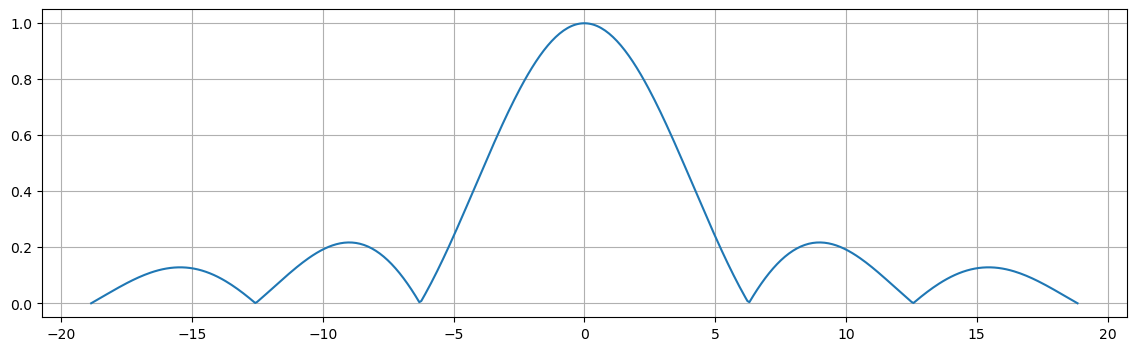

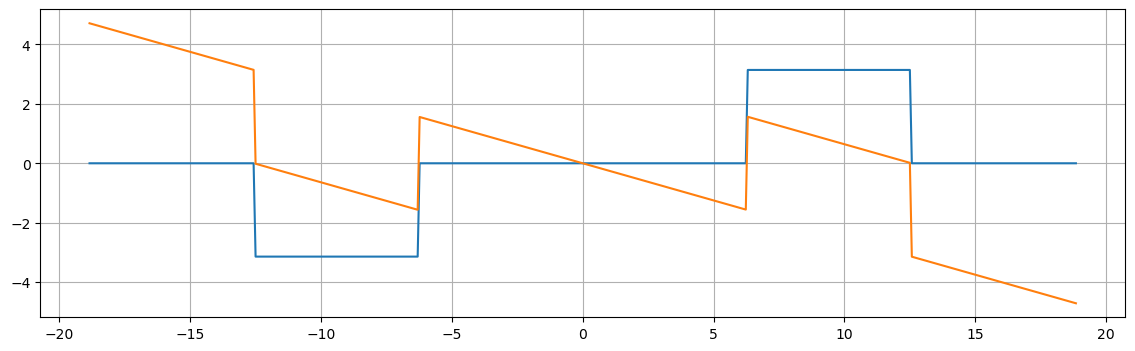

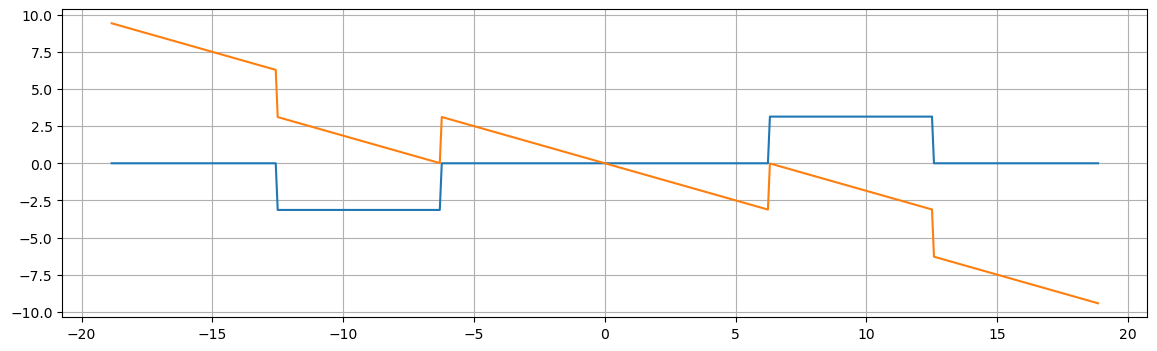

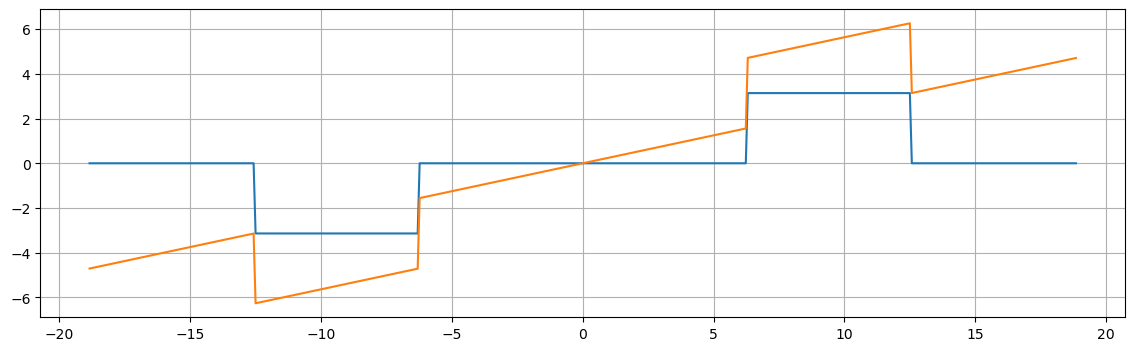

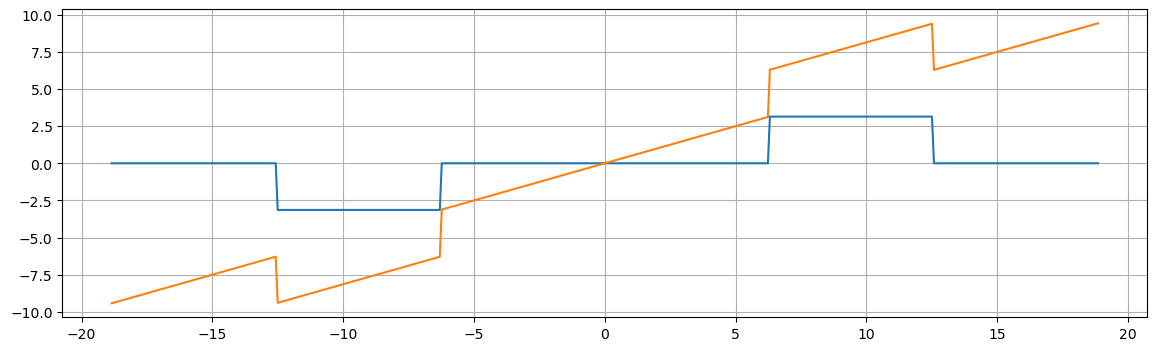

In [50]:
# --- 10 --- obd impulse spek 
D = 1; theta = 1; tau =.5
omega = np.linspace(-6*np.pi,6*np.pi,num=500)
X = D / theta * np.sinc(theta /2 * omega / np.pi) # pozor sinc ... 
fig = plt.figure(figsize=(14,4)); plt.plot(omega,np.abs(X)); plt.gca().grid()
phase = np.angle(X); phase[omega < 0] = -phase[omega < 0]
tau =.25; corrphase = phase - omega * tau
fig = plt.figure(figsize=(14,4)); plt.plot(omega,phase); plt.plot(omega,corrphase);plt.gca().grid()
tau =.5; corrphase = phase - omega * tau
fig = plt.figure(figsize=(14,4)); plt.plot(omega,phase); plt.plot(omega,corrphase);plt.gca().grid()
tau =-.25; corrphase = phase - omega * tau
fig = plt.figure(figsize=(14,4)); plt.plot(omega,phase); plt.plot(omega,corrphase);plt.gca().grid()
tau =-.5; corrphase = phase - omega * tau
fig = plt.figure(figsize=(14,4)); plt.plot(omega,phase); plt.plot(omega,corrphase);plt.gca().grid()


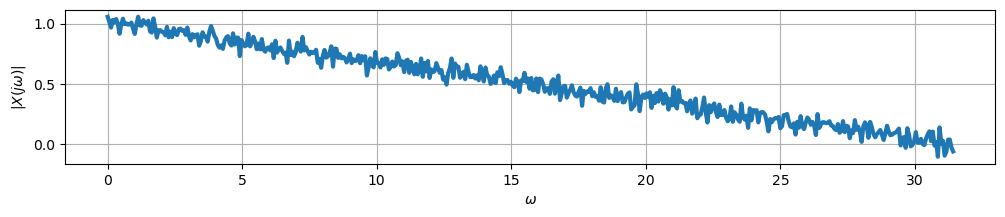

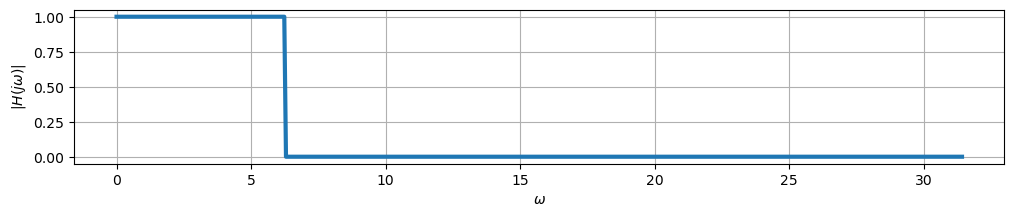

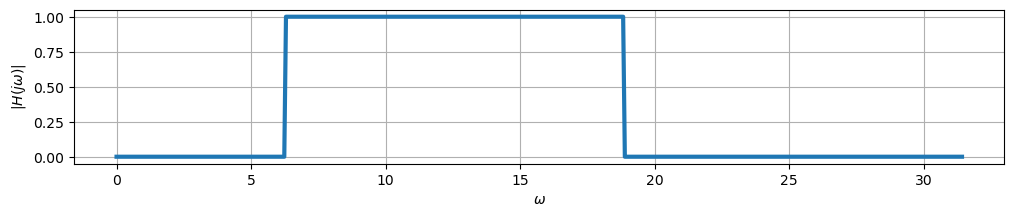

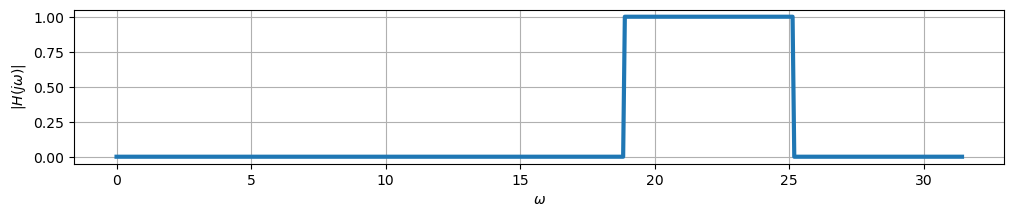

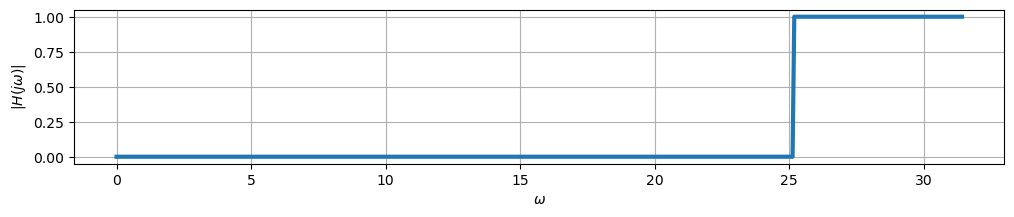

In [66]:
# ---- 13 spek vstupu a filru ----
limomega = 10 * np.pi
om = np.linspace(0, limomega, 500)
X = 1 - om / limomega + 0.05 * np.random.standard_normal(om.shape)
fig=plt.figure(figsize=(12,2)); plt.plot(om, X, linewidth=3); 
fig.gca().set_xlabel('$\omega$'); fig.gca().set_ylabel('$|X(j\omega)|$'); fig.gca().grid()
fig.savefig('fig/13_x.eps',bbox_inches='tight')
H = np.zeros(om.shape); H[om < (2 * np.pi)] = 1
fig=plt.figure(figsize=(12,2)); plt.plot(om, H, linewidth=3); 
fig.gca().set_xlabel('$\omega$'); fig.gca().set_ylabel('$|H(j\omega)|$'); fig.gca().grid()
fig.savefig('fig/13_h_lp.eps',bbox_inches='tight')
H = np.zeros(om.shape); H[(om < (6 * np.pi)) & (om > (2 * np.pi))] = 1
fig=plt.figure(figsize=(12,2)); plt.plot(om, H, linewidth=3); 
fig.gca().set_xlabel('$\omega$'); fig.gca().set_ylabel('$|H(j\omega)|$'); fig.gca().grid()
fig.savefig('fig/13_h_bp1.eps',bbox_inches='tight')
H = np.zeros(om.shape); H[(om < (8 * np.pi)) & (om > (6 * np.pi))] = 1
fig=plt.figure(figsize=(12,2)); plt.plot(om, H, linewidth=3); 
fig.gca().set_xlabel('$\omega$'); fig.gca().set_ylabel('$|H(j\omega)|$'); fig.gca().grid()
fig.savefig('fig/13_h_bp2.eps',bbox_inches='tight')
H = np.zeros(om.shape); H[om > 8 * np.pi] = 1
fig=plt.figure(figsize=(12,2)); plt.plot(om, H, linewidth=3); 
fig.gca().set_xlabel('$\omega$'); fig.gca().set_ylabel('$|H(j\omega)|$'); fig.gca().grid()
fig.savefig('fig/13_h_hp.eps',bbox_inches='tight')


